In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [4]:
df =pd.read_excel('/kaggle/input/fraud-online/fraud_detection.csv.xlsx')

In [5]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
102725,10,CASH_IN,215356.56,C2129587433,20557.00,235913.56,C1848552071,6442.43,0.00,0,0
102726,10,CASH_OUT,417808.25,C209979200,21510.00,0.00,C979778117,234049.06,843616.39,0,0
102727,10,CASH_IN,119983.69,C302495061,61623.00,181606.69,C585017276,0.00,0.00,0,0
102728,10,CASH_OUT,374803.88,C99452710,63245.00,0.00,C664038638,964585.58,1421881.86,0,0
102729,10,CASH_IN,425821.82,C208513750,32999.00,458820.82,C1806844315,61627.00,0.00,0,0
102730,10,CASH_OUT,378384.89,C553587228,167.00,0.00,C1781090157,4740825.47,5873978.21,0,0
102731,10,PAYMENT,25291.34,C259892811,38362.72,13071.39,M1723909173,0.00,0.00,0,0
102732,10,CASH_OUT,186418.07,C127592737,13071.39,0.00,C364592569,521280.03,345930.37,0,0
102733,10,CASH_OUT,606095.77,C1596814396,0.00,0.00,C1730312920,1028211.24,1819214.16,0,0
102734,10,CASH_OUT,113435.56,C1031855724,0.00,0.00,C2036376635,132059.00,564091.26,0,0


In [7]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102735 entries, 0 to 102734
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            102735 non-null  int64  
 1   type            102735 non-null  object 
 2   amount          102735 non-null  float64
 3   nameOrig        102735 non-null  object 
 4   oldbalanceOrg   102735 non-null  float64
 5   newbalanceOrig  102735 non-null  float64
 6   nameDest        102735 non-null  object 
 7   oldbalanceDest  102735 non-null  float64
 8   newbalanceDest  102735 non-null  float64
 9   isFraud         102735 non-null  int64  
 10  isFlaggedFraud  102735 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.6+ MB


In [9]:
df['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.shape

(102735, 11)

In [12]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
type=df['type'].value_counts()

In [14]:
type

type
PAYMENT     40385
CASH_OUT    31798
CASH_IN     20764
TRANSFER     8772
DEBIT        1016
Name: count, dtype: int64

In [15]:
transaction=type.index

In [16]:
quantity=type.values

In [17]:
#create piechart
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'kaggle'  # or 'kaggle'

In [18]:
fig=px.pie(df,values=quantity,names=transaction,hole=0.4,title="Distribution of transaction type")
fig.show()


fig.write_html("output.html")  # Save to an HTML file


In [20]:
df=df.dropna()

In [21]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
102730,10,CASH_OUT,378384.89,C553587228,167.00,0.00,C1781090157,4740825.47,5873978.21,0,0
102731,10,PAYMENT,25291.34,C259892811,38362.72,13071.39,M1723909173,0.00,0.00,0,0
102732,10,CASH_OUT,186418.07,C127592737,13071.39,0.00,C364592569,521280.03,345930.37,0,0
102733,10,CASH_OUT,606095.77,C1596814396,0.00,0.00,C1730312920,1028211.24,1819214.16,0,0


In [22]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

/tmp/ipykernel_24/3691033298.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [23]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
102730,10,1,378384.89,C553587228,167.00,0.00,C1781090157,4740825.47,5873978.21,0,0
102731,10,2,25291.34,C259892811,38362.72,13071.39,M1723909173,0.00,0.00,0,0
102732,10,1,186418.07,C127592737,13071.39,0.00,C364592569,521280.03,345930.37,0,0
102733,10,1,606095.77,C1596814396,0.00,0.00,C1730312920,1028211.24,1819214.16,0,0


In [24]:

# Map the values
df['isFraud'] = df['isFraud'].map({0: 'No fraud', 1: 'fraud'})

# Display the modified DataFrame
print("\nModified DataFrame:")
print(df)


Modified DataFrame:
        step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0          1     2    9839.64  C1231006815      170136.00       160296.36   
1          1     2    1864.28  C1666544295       21249.00        19384.72   
2          1     4     181.00  C1305486145         181.00            0.00   
3          1     1     181.00   C840083671         181.00            0.00   
4          1     2   11668.14  C2048537720       41554.00        29885.86   
...      ...   ...        ...          ...            ...             ...   
102730    10     1  378384.89   C553587228         167.00            0.00   
102731    10     2   25291.34   C259892811       38362.72        13071.39   
102732    10     1  186418.07   C127592737       13071.39            0.00   
102733    10     1  606095.77  C1596814396           0.00            0.00   
102734    10     1  113435.56  C1031855724           0.00            0.00   

           nameDest  oldbalanceDest  newbalanceDest   

In [25]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [26]:
y=df.iloc[:,-2]

In [27]:
y

0         No fraud
1         No fraud
2            fraud
3            fraud
4         No fraud
            ...   
102730    No fraud
102731    No fraud
102732    No fraud
102733    No fraud
102734    No fraud
Name: isFraud, Length: 102735, dtype: object

Non-numeric columns: Index(['nameOrig', 'nameDest', 'isFraud'], dtype='object')


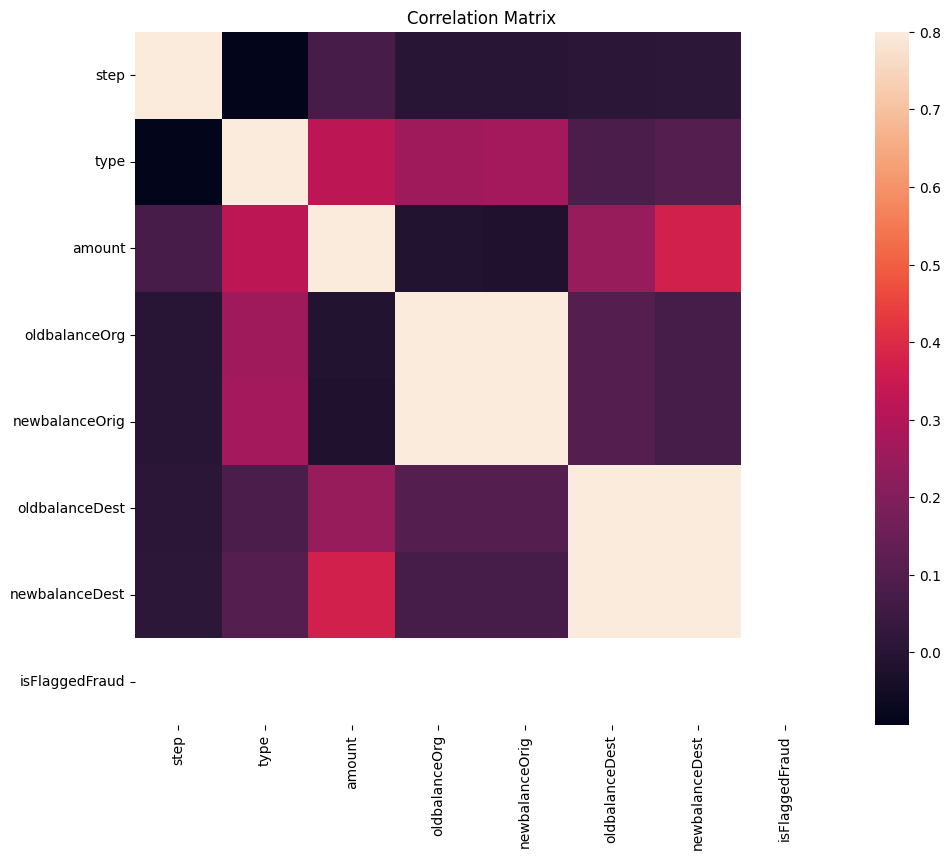

In [70]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Option A: Drop non-numeric columns
data_numeric = df.drop(non_numeric_cols, axis=1)

# Option B: Convert categorical columns to numeric using one-hot encoding
# data_encoded = pd.get_dummies(data, drop_first=True)

# Compute the correlation matrix
corrmat = data_numeric.corr()  # or use data_encoded.corr() if you encoded
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("Correlation Matrix")
plt.show()

In [34]:
# Dividing the X and the Y from the dataset
X = df.drop(['amount'], axis=1)
Y = df["amount"]
xData = X.values
yData = Y.values

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [43]:
model=DecisionTreeClassifier()

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [46]:
model.score(xtest,ytest) *100

99.91239597021463

In [47]:
y_pred1=model.predict(xtest)

In [48]:
accuracy_score(ytest,y_pred1)

0.9991239597021463

In [49]:
# Assuming ytest and y_pred1 are your true and predicted labels
precision = precision_score(ytest, y_pred1, pos_label='fraud')
print("Precision:", precision)

Precision: 0.5882352941176471


In [50]:
# Assuming ytest and y_pred1 are your true and predicted labels
recall = recall_score(ytest, y_pred1, pos_label='fraud')
print("Recall:", recall)

Recall: 0.47619047619047616


In [51]:
# Assuming ytest and y_pred1 are your true and predicted labels
# Use 'fraud' as the positive class label
f1 = f1_score(ytest, y_pred1, pos_label='fraud')

print("F1 Score:", f1)

F1 Score: 0.5263157894736842


In [52]:
model=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)



In [53]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [54]:
y_pred2=model.predict(xtest)

In [55]:
accuracy_score(ytest,y_pred2)

0.9990266218912737

In [56]:

# Assuming ytest and y_pred1 are your true and predicted labels
precision = precision_score(ytest, y_pred2, pos_label='fraud')
print("Precision:", precision)

Precision: 0.6666666666666666


In [57]:


# Assuming ytest and y_pred1 are your true and predicted labels
recall = recall_score(ytest, y_pred2, pos_label='fraud')
print("Recall:", recall)

Recall: 0.09523809523809523


In [58]:


# Assuming ytest and y_pred1 are your true and predicted labels
# Use 'fraud' as the positive class label
f1 = f1_score(ytest, y_pred2, pos_label='fraud')

print("F1 Score:", f1)

F1 Score: 0.16666666666666666


In [59]:
model.predict([[2,9839,170136,160296]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array(['No fraud'], dtype=object)

In [60]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
102730,1,378384.89,167.00,0.00
102731,2,25291.34,38362.72,13071.39
102732,1,186418.07,13071.39,0.00
102733,1,606095.77,0.00,0.00


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [63]:
y_pred3=rf.predict(xtest)

In [64]:
accuracy_score(ytest,y_pred3)

0.9992212975130189

In [65]:
precision_score(ytest,y_pred3,pos_label='fraud')

0.7777777777777778

In [66]:
recall_score(ytest,y_pred3,pos_label='fraud')

0.3333333333333333

In [67]:
f1_score(ytest,y_pred3,pos_label='fraud')

0.4666666666666666

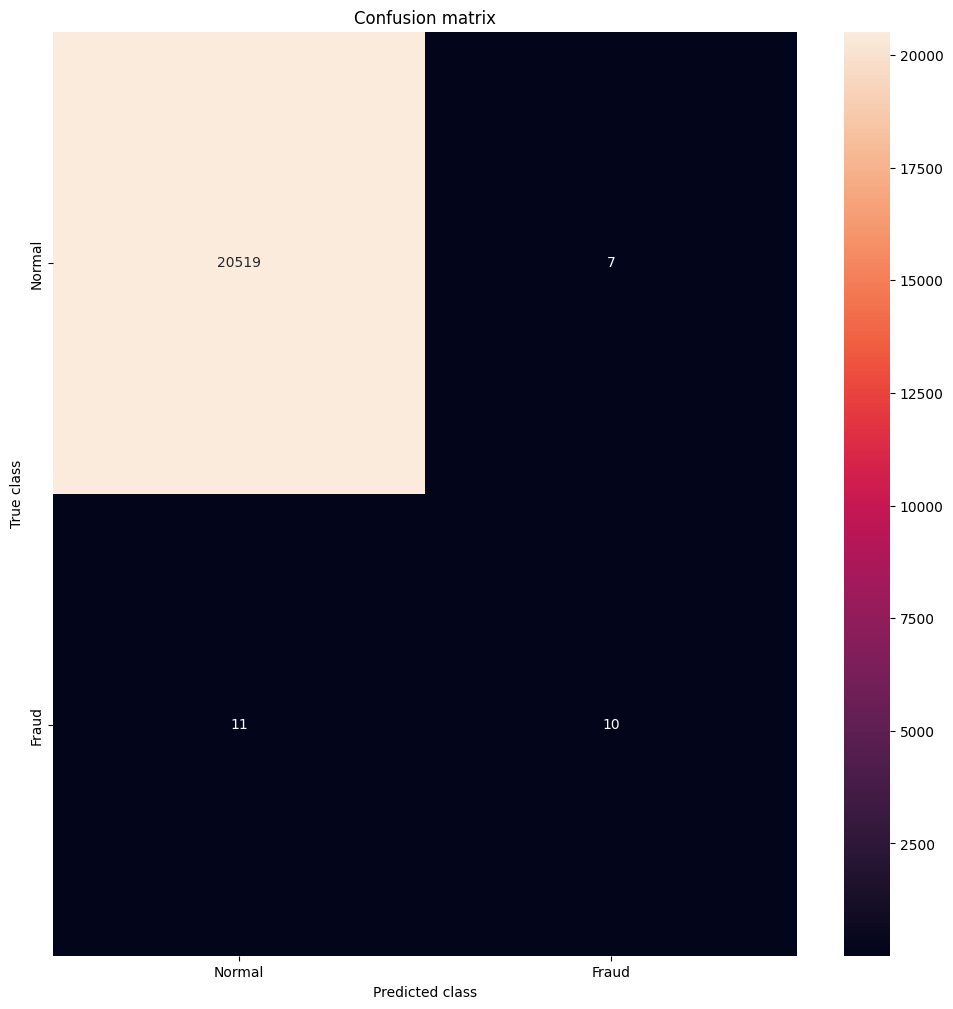

In [74]:
# Printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, y_pred1)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

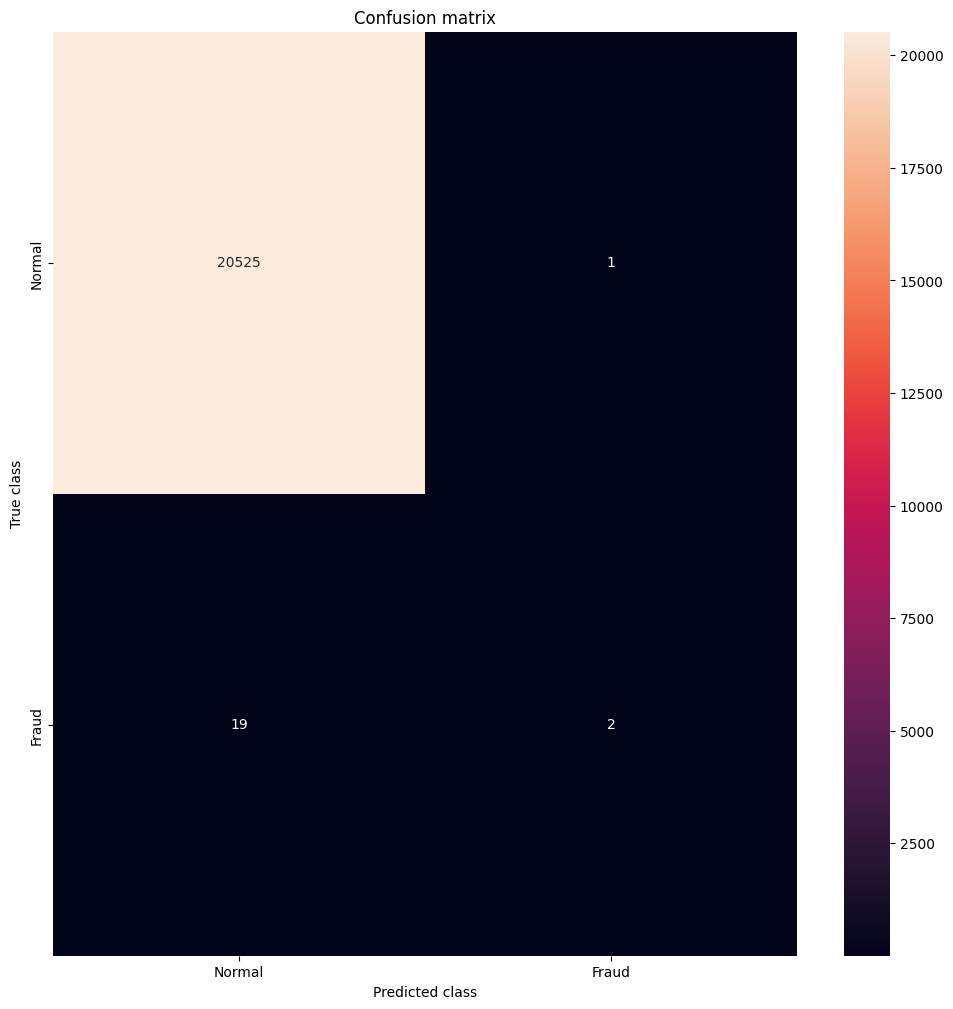

In [75]:
# Printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, y_pred2)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

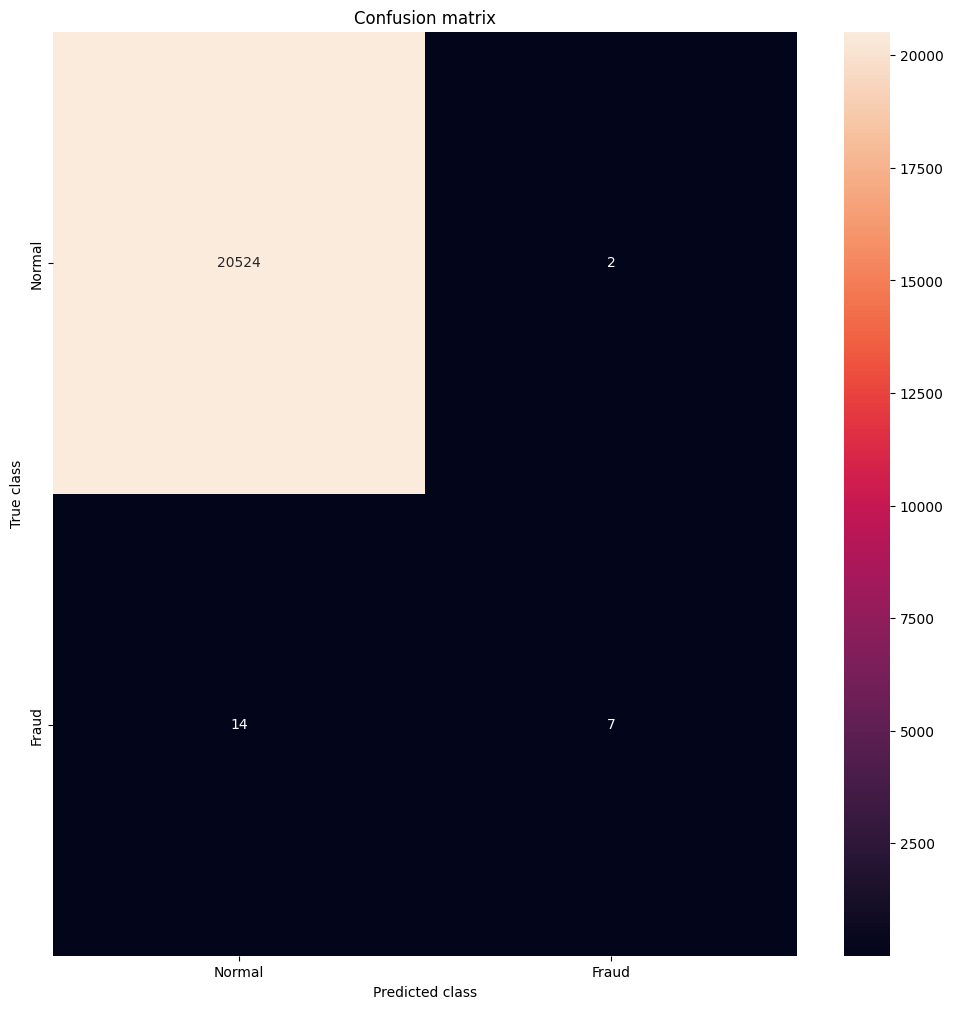

In [76]:
# Printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(ytest, y_pred3)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [77]:
models=[]
results=[]
names=[]

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [80]:
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))

In [81]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('CART', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier())]

In [82]:
from sklearn import model_selection

# Initialize lists to store results
results = []
names = []

# Loop through the models
for name, model in models:
    # Indent the following lines to be part of the for loop
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_result = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    
    # Append results and names
    results.append(cv_result)  # Corrected from cv.result to cv_result
    names.append(name)          # Corrected from names to name
    
    # Print the mean of cross-validation results
    meg = '%s: %f' % (name, cv_result.mean())
    print(meg)

LR: 0.999260
KNN: 0.998929
NB: 0.978050
SVM: 0.998832
CART: 0.998803
RF: 0.999104


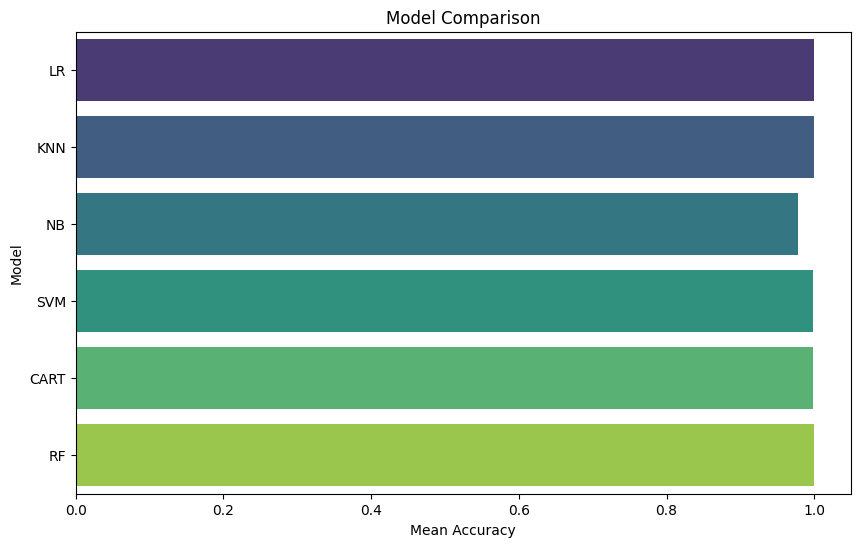

In [83]:
# Convert results to a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': names,
    'Mean Accuracy': [result.mean() for result in results]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Mean Accuracy')
plt.ylabel('Model')
plt.show()

In [84]:
import pickle
with open('fraud_detection_model.pkl','wb') as model_file:
    pickle.dump(model,model_file,protocol=2)